Using any two or several clustering techniques we have covered in class – determine the groups of “similar” panelist.  You will choose what set of attributes to use for determining similarity-explain why you chose them.  Provide the evaluation and validation of the produced model(s).  Describe in detail how you prepared the data, created the training data set, designed features and trained the model (what options, parameters, number of clusters, types of clustering techniques(s) used, etc.).  Compare the models produced. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%cd /Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/IRI Data - Project/Data/IRI_Data/demos trips external 1_11 may 13

/Users/Deepthi/Documents/DSE/Q3_DSE220 - Machine Learning/IRI Data - Project/Data/IRI_Data/demos trips external 1_11 may 13


In [3]:
demos11 = pd.read_csv('ads demos11.csv')

In [4]:
combined_demo = demos11

In [5]:
cols_to_drop = ['MALE_SMOKE','FEM_SMOKE','HH_LANG','Hispanic Flag','HISP_CAT','RACE2','MICROWAVE','market based upon zipcode',
                'EXT_FACT']
combined_demo2 = combined_demo.drop(cols_to_drop,axis=1)

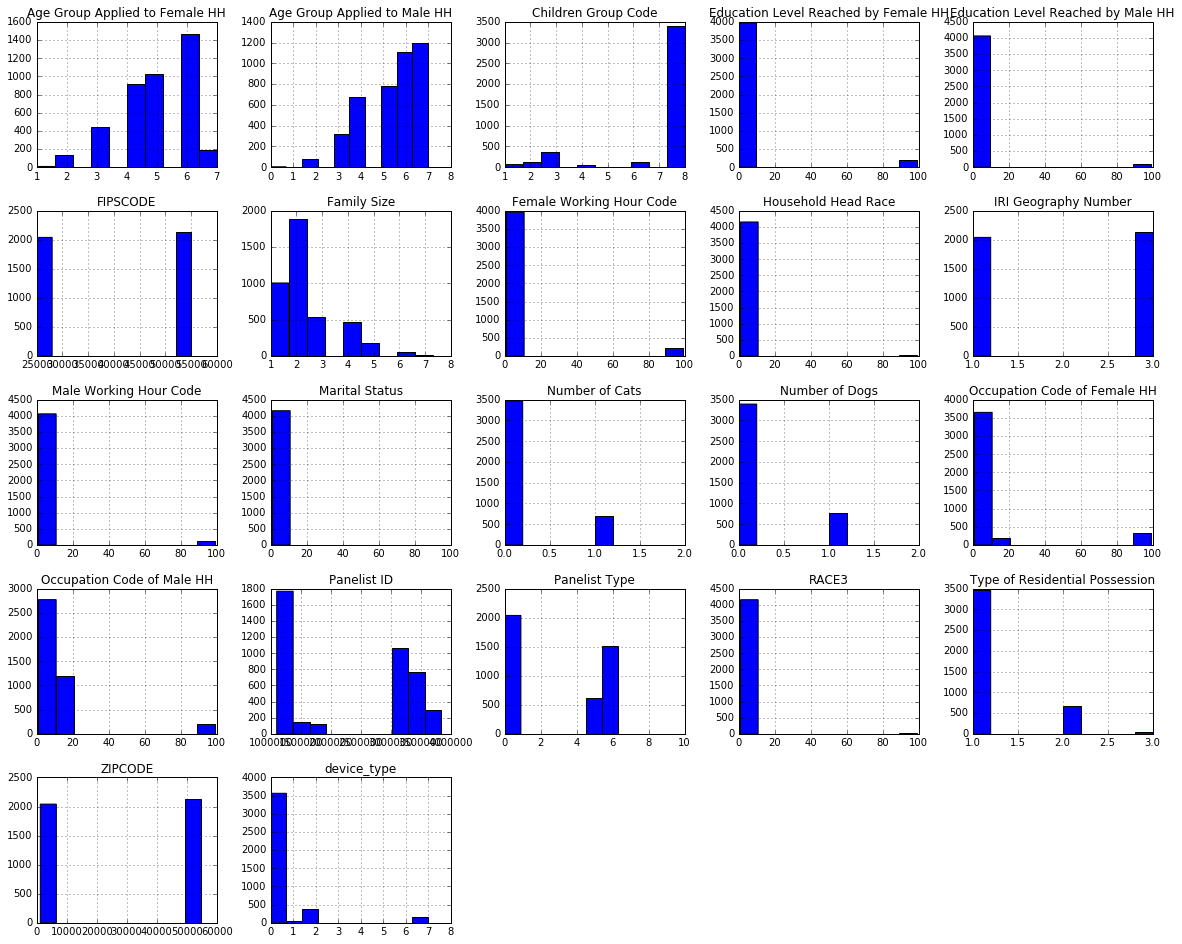

In [6]:
combined_demo2.hist(figsize=(20,50), layout=(15,5))
plt.show()

In [7]:
combined_demo2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Panelist ID,4171,2303335.146488,1053446.178836,1100016,1201131.5,3103820,3303036.5,3843110
Panelist Type,4171,2.922321,2.875549,0,0.0,5,6.0,9
Family Size,4171,2.326540,1.212965,1,2.0,2,3.0,8
Household Head Race,4171,1.494845,6.433289,1,1.0,1,1.0,99
Type of Residential Possession,4171,1.181491,0.409600,1,1.0,1,1.0,3
Age Group Applied to Male HH,4171,5.468713,1.361395,0,4.0,6,7.0,7
Education Level Reached by Male HH,4171,5.475426,15.343096,0,0.0,3,5.0,99
Occupation Code of Male HH,4171,11.648765,19.762671,1,5.0,9,11.0,99
Male Working Hour Code,4171,5.234956,15.466400,1,2.0,3,4.0,99
Age Group Applied to Female HH,4171,4.906018,1.220249,1,4.0,5,6.0,7


In [8]:
## Data cleaning

for_clustering3 = combined_demo2.fillna(0)
for_clustering3.replace('99',0,inplace=True)
for_clustering3.replace('98',0,inplace=True)
for_clustering3 = for_clustering3.convert_objects(convert_numeric=True)
for_clustering3 = for_clustering3.fillna(0)

In [9]:
for_clustering3['Male Working Hour Code'].replace(7,0,inplace=True)
for_clustering3['Female Working Hour Code'].replace(7,0,inplace=True)

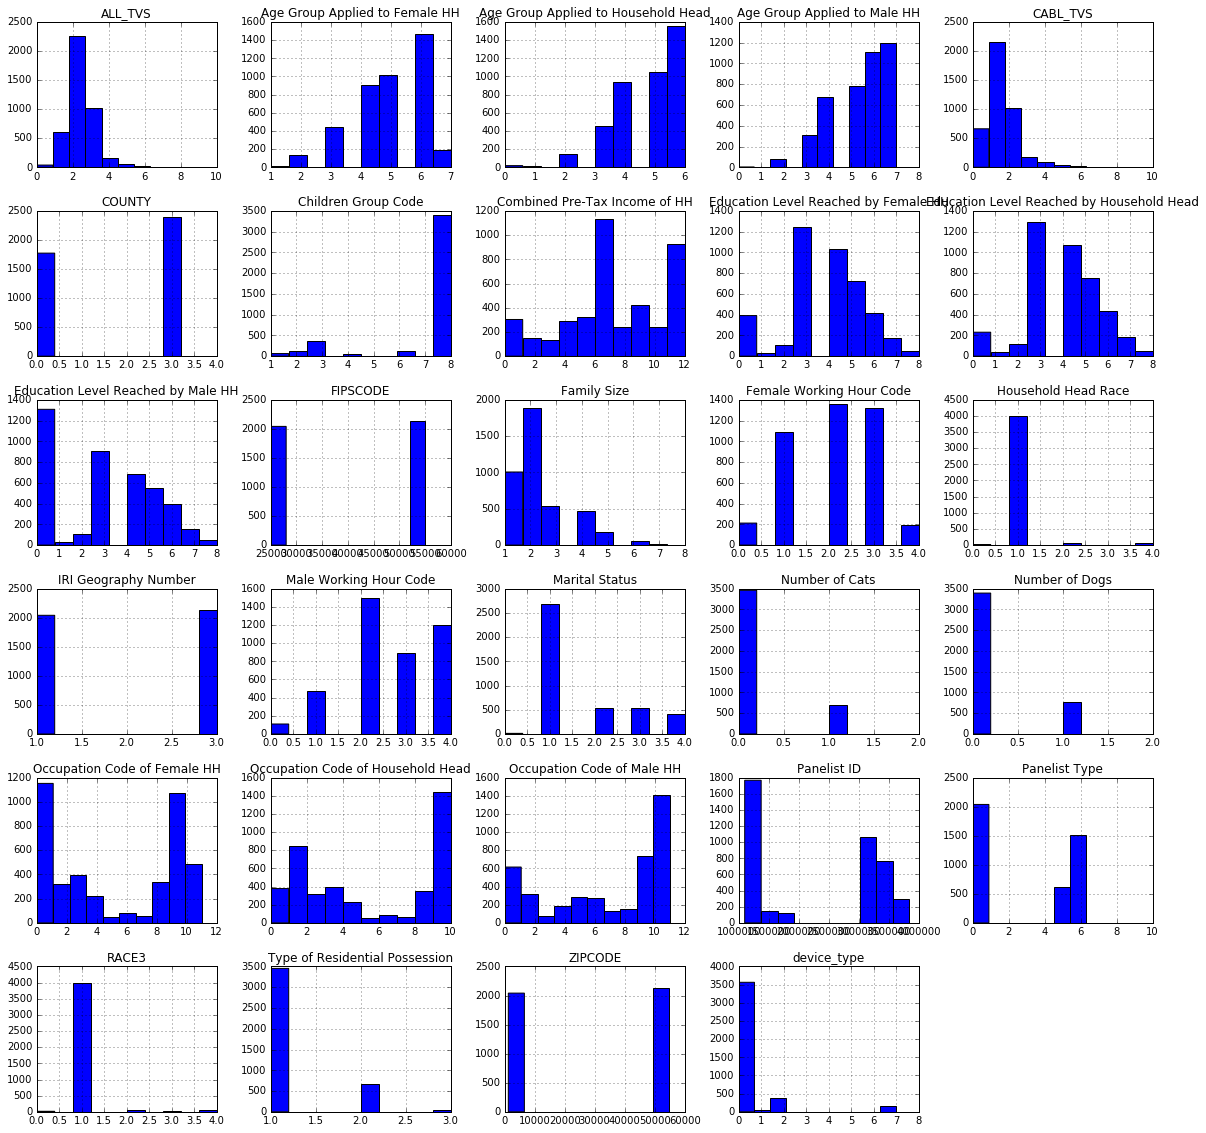

In [10]:
for_clustering5 = for_clustering3.copy()
for_clustering5.hist(figsize=(20,50), layout=(15,5))
plt.show()

In [29]:
## Keep only useful columns

## Removing these columns as they do not have much information 
drop_cols = ['ALL_TVS','CABL_TVS','COUNTY',
             'Children Group Code',
             'Household Head Race','IRI Geography Number',
             'Occupation Code of Household Head',
             'Education Level Reached by Household Head',
             'Age Group Applied to Household Head',
             'RACE3','ZIPCODE','device_type','Panelist ID','Marital Status',
             'Panelist Type', 'Female Working Hour Code','Male Working Hour Code',
#              'Occupation Code of Female HH','Occupation Code of Male HH',
             'FIPSCODE','Type of Residential Possession','Number of Cats',
             'Number of Dogs'
            ]

for_clustering6 = for_clustering5.drop(drop_cols,axis=1)

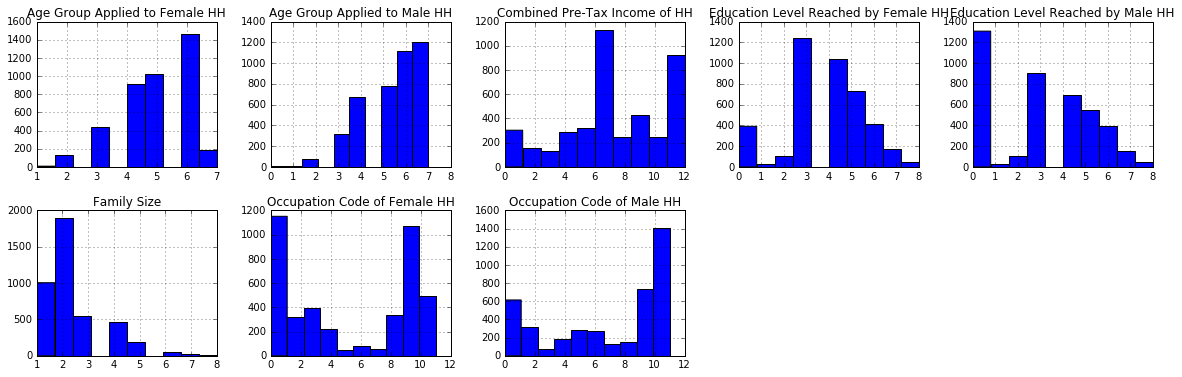

In [30]:
for_clustering6.hist(figsize=(20,50), layout=(15,5))
plt.show()

In [31]:
for_clustering6.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Combined Pre-Tax Income of HH,4171,7.173100,3.243626,0,5,7,10,12
Family Size,4171,2.326540,1.212965,1,2,2,3,8
Age Group Applied to Male HH,4171,5.468713,1.361395,0,4,6,7,7
Education Level Reached by Male HH,4171,2.935747,2.299764,0,0,3,5,8
Occupation Code of Male HH,4171,6.972908,3.825634,0,4,9,11,11
Age Group Applied to Female HH,4171,4.906018,1.220249,1,4,5,6,7
Education Level Reached by Female HH,4171,3.796691,1.748833,0,3,4,5,8
Occupation Code of Female HH,4171,5.293695,3.809090,0,1,5,9,11


[220288.0, 143885.0, 113561.0, 95194.0, 85660.0, 76395.0, 69250.0, 64634.0, 60582.0, 57287.0, 54519.0, 52268.0, 49634.0, 48138.0, 46244.0, 44205.0, 43051.0, 41673.0, 40971.0, 39751.0, 38874.0, 38114.0, 37380.0, 36123.0, 35659.0, 35031.0, 34416.0, 33917.0, 33339.0, 32718.0, 32423.0, 31767.0, 31379.0, 30921.0, 30313.0, 29980.0, 29764.0, 29464.0, 29090.0, 28519.0, 28210.0, 28014.0, 27463.0, 27460.0, 27061.0, 26654.0, 26507.0, 26241.0, 26077.0]


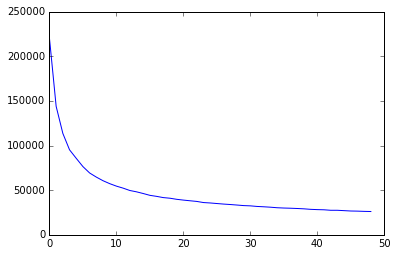

In [32]:
from sklearn.cluster import KMeans

for_clustering6 = for_clustering6.fillna(-1)
inertia = []

K = range(1,50)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kn2d = kmeans.fit(for_clustering6)
    inertia.append(round(kn2d.inertia_))
    
print inertia

import matplotlib.pyplot as plt
plt.plot(inertia)
plt.show()

In [39]:

#################### Continue from here ######################

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6,random_state=4)
kn2d = kmeans.fit(for_clustering6)
labels_normal = kn2d.predict(for_clustering6)

labels_normal = pd.DataFrame(labels_normal)

In [40]:
centers = pd.DataFrame(kn2d.cluster_centers_)

centers_rank = centers.rank(axis=0, ascending=True)

In [41]:
centers.columns = for_clustering6.columns

In [42]:
centers_rank.columns = for_clustering6.columns

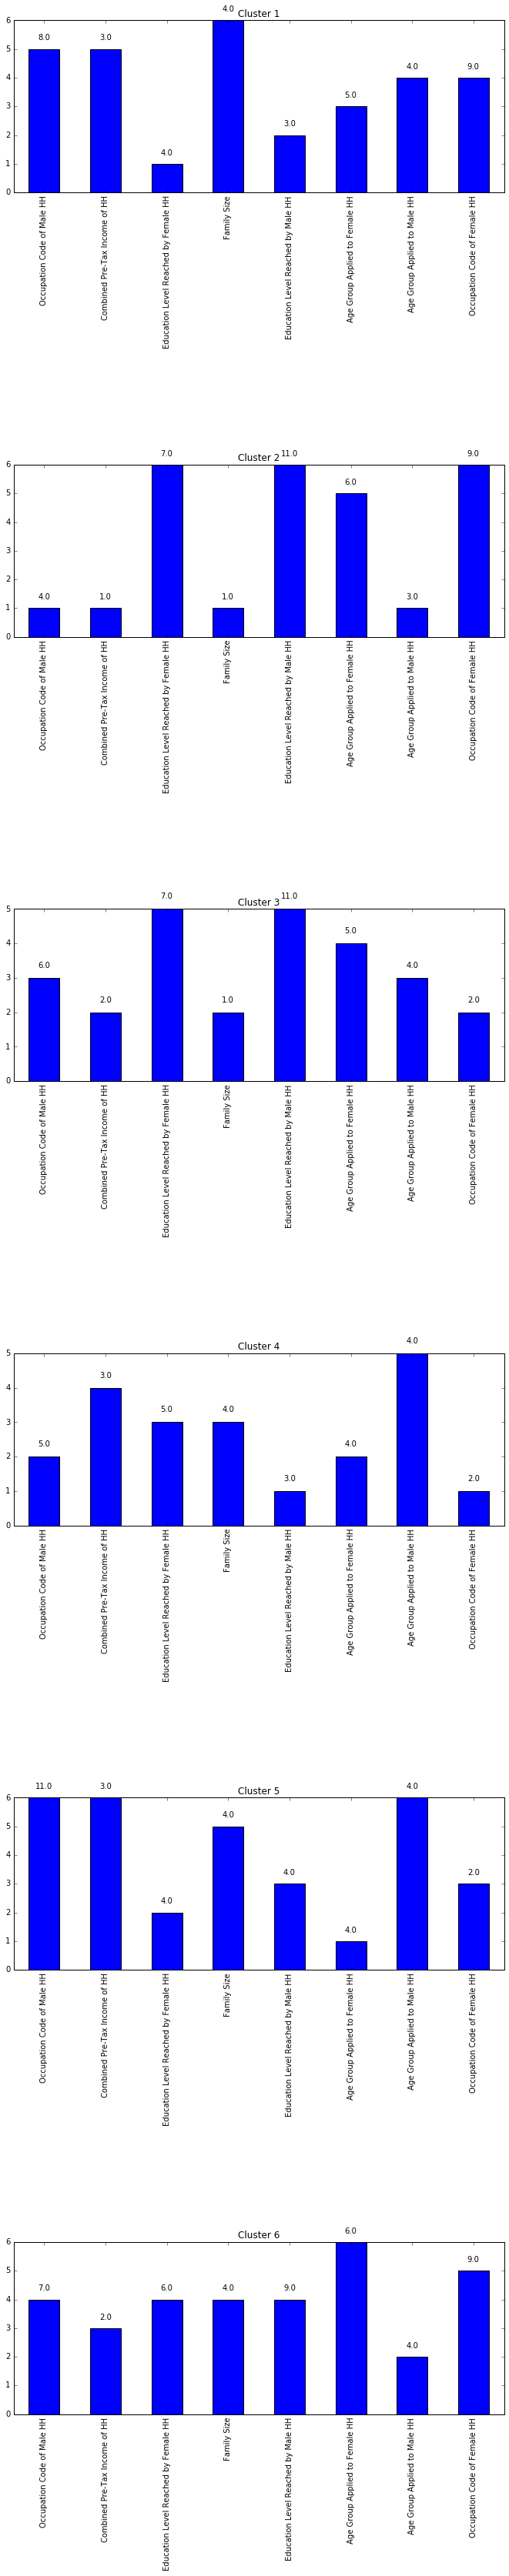

In [43]:
import matplotlib.patches as patches
f, a = plt.subplots(6,1)
f.tight_layout()
left, width = .25, .5
bottom, height = .25, .5
title_list = ['Cluster 1','Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6']
for i in range(6):
    df = pd.DataFrame(zip(centers_rank.ix[i],centers.ix[i]))
    df.columns = ['rank','val']
    df['rank'].plot(kind='bar',ax=a[i],figsize=(10,50))
    a[i].set_xticklabels(set(for_clustering6.columns),rotation=90)
    a[i].set_title(title_list[i])
    rects = a[i].patches
    labels = list(df['val'].apply(lambda x:round(x)))
    for rect, label in zip(rects, labels):
        height = rect.get_height()
        a[i].text(rect.get_x() + rect.get_width()/2, height + 0.25, label, ha='center', va='bottom')